# Multilingualism in Basque Country

Basque Country is an autonomous community in northern Spain with two co-official languages: Spanish and Basque. The latter one is a language isolate spoken solely in this part of Europe but does not belong to the Indo-European language family. People of Basque Country also speak English, which has been taught as a foreign language in their academic curriculum since the early 1970s. Due to its multilingual reality and linguistic complexity, Basque Country provides researcher with an ideal environment to investigate aspects related to multilingualism like language use, proficiency, dominance, and exposure. 

The Basque, English, and Spanish tests (BEST) dataset is the result of a collaborative project developed at the Basque Center on Cognition, Brain and Language (BCBL) with the aim of providing researchers with a series of norms that can be used to better characterize the test samples. (Front. Psychol., 06 April 2017 | https://doi.org/10.3389/fpsyg.2017.00522)

### The Data

In [1]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind
import numpy as np
import statistics

best = pd.read_csv('BEST.csv')

In [2]:
best.describe()

,PARTICIPANT.NUMBER,AGE.IN.YEARS,PERCENTAGE.EXPOSED.SPANISH,PERCENTAGE.EXPOSED.BASQUE,PERCENTAGE.EXPOSED.ENGLISH,SELF.PERCEIVED.LEVEL.SPANISH,SELF.PERCEIVED.LEVEL.BASQUE,SELF.PERCEIVED.LEVEL.ENGLISH,INTERVIEW.MARK.SPANISH,INTERVIEW.MARK.BASQUE,INTERVIEW.MARK.ENGLISH,AGE.OF.ACQUISITION.SPANISH,AGE.OF.ACQUISITION.BASQUE,AGE.OF.ACQUISITION.ENGLISH,PICTURE.NAMING.TEST.SPANISH,PICTURE.NAMING.TEST.BASQUE,PICTURE.NAMING.TEST.ENGLISH,LEXTALE.TEST.SPANISH,LEXTALE.TEST.BASQUE,LEXTALE.TEST.ENGLISH
count,650.00000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,325.50000,25.023077,55.446154,32.723077,11.153846,9.261538,8.038462,6.138462,5.0,4.343077,3.323077,0.672308,1.681538,6.372308,64.515385,54.178462,44.810769,94.375662,86.347692,66.750000
std,187.78312,5.583193,19.481753,18.655921,9.358023,0.877328,1.670020,1.863417,0.0,0.900688,0.943842,1.554952,1.810379,2.487535,1.160698,11.437194,11.826801,5.109826,10.198751,9.229775
min,1.00000,18.000000,10.000000,0.000000,0.000000,6.000000,1.000000,1.000000,5.0,1.000000,1.000000,0.000000,0.000000,0.000000,55.000000,7.000000,8.000000,48.330000,48.000000,41.250000
25%,163.25000,21.000000,40.000000,20.000000,10.000000,9.000000,7.000000,5.000000,5.0,4.000000,3.000000,0.000000,0.000000,5.000000,64.000000,48.000000,36.000000,92.500000,81.000000,61.250000
50%,325.50000,23.000000,60.000000,30.000000,10.000000,9.000000,8.000000,6.000000,5.0,5.000000,3.000000,0.000000,2.000000,6.000000,65.000000,58.000000,46.000000,95.830000,89.000000,66.250000
75%,487.75000,27.000000,70.000000,40.000000,10.000000,10.000000,9.000000,7.000000,5.0,5.000000,4.000000,0.000000,3.000000,8.000000,65.000000,63.000000,54.000000,97.500000,94.000000,71.250000
max,650.00000,50.000000,100.000000,90.000000,70.000000,10.000000,10.000000,10.000000,5.0,5.000000,5.000000,6.000000,6.000000,12.000000,65.000000,65.000000,65.000000,100.000000,100.000000,97.500000


In [3]:
best.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PARTICIPANT.NUMBER            650 non-null    int64  
 1   AGE.IN.YEARS                  650 non-null    int64  
 2   GENDER                        650 non-null    object 
 3   MAXIMUM.EDUCATIONAL.LEVEL     650 non-null    object 
 4   HANDEDNESS                    650 non-null    object 
 5   PERCENTAGE.EXPOSED.SPANISH    650 non-null    int64  
 6   PERCENTAGE.EXPOSED.BASQUE     650 non-null    int64  
 7   PERCENTAGE.EXPOSED.ENGLISH    650 non-null    int64  
 8   SELF.PERCEIVED.LEVEL.SPANISH  650 non-null    int64  
 9   SELF.PERCEIVED.LEVEL.BASQUE   650 non-null    int64  
 10  SELF.PERCEIVED.LEVEL.ENGLISH  650 non-null    int64  
 11  INTERVIEW.MARK.SPANISH        650 non-null    int64  
 12  INTERVIEW.MARK.BASQUE         650 non-null    int64  
 13  INTER

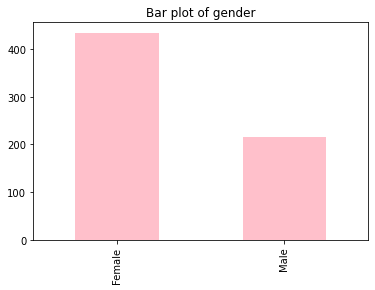

In [4]:
import matplotlib.pyplot as plt
best['GENDER'].value_counts().plot(kind = 'bar', color = 'pink', title = 'Bar plot of gender')
plt.show();

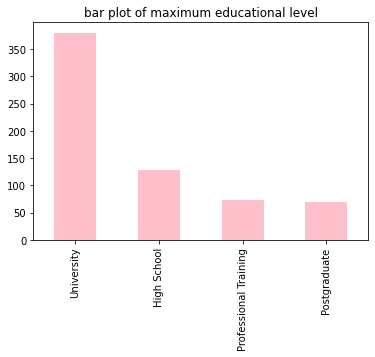

In [5]:
best['MAXIMUM.EDUCATIONAL.LEVEL'].value_counts().plot(kind = 'bar', color = 'pink', title = 'bar plot of maximum educational level')
plt.show();

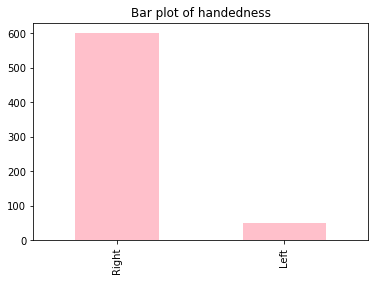

In [6]:
best['HANDEDNESS'].value_counts().plot(kind = 'bar', color = 'pink', title = 'Bar plot of handedness')
plt.show();

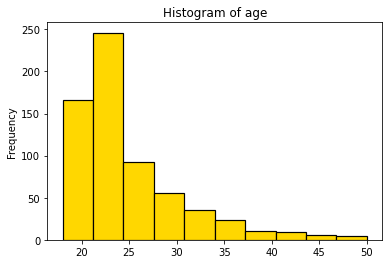

In [7]:
best['AGE.IN.YEARS'].plot(kind = 'hist', color = 'gold', edgecolor = 'black', 
                linewidth = 1.2, title = 'Histogram of age')
plt.show(); 

### Research Question 1: Is there a difference in language proficiency between the three languages spoken in Basque Country for all four measurements?

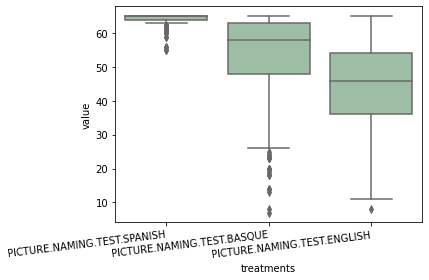

,sum_sq,df,F,PR(>F)
C(treatments),126290.126154,2.0,696.376493,7.275071e-229
Residual,176547.369231,1947.0,NaN,NaN


In [45]:
#PICTURE.NAMING.TEST

bestM1 = best[["PICTURE.NAMING.TEST.SPANISH", "PICTURE.NAMING.TEST.BASQUE", "PICTURE.NAMING.TEST.ENGLISH"]]
bestM1.describe()
bestM1M = pd.melt(bestM1.reset_index(), id_vars=['index'], value_vars=['PICTURE.NAMING.TEST.SPANISH', 'PICTURE.NAMING.TEST.BASQUE', 'PICTURE.NAMING.TEST.ENGLISH'])
bestM1M.columns = ['index', 'treatments', 'value']

ax = sns.boxplot(x = 'treatments', y='value', data=bestM1M, color='#99c2a2')
#ax = sns.countplot(x="treatments", data=bestM1M)

ax.set_xticklabels(ax.get_xticklabels(), rotation=7, ha="right")
plt.tight_layout()
plt.show()
#ax = sns.swarmplot(x="treatments", y="value", data=bestM1M, color='#7d0013')

fvalue, pvalue = stats.f_oneway(bestM1['PICTURE.NAMING.TEST.SPANISH'], bestM1['PICTURE.NAMING.TEST.BASQUE'], bestM1['PICTURE.NAMING.TEST.ENGLISH'])

model1 = ols('value ~ C(treatments)', data=bestM1M).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)
anova_table1

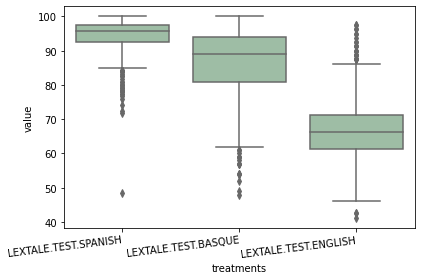

,sum_sq,df,F,PR(>F)
C(treatments),262533.918659,2.0,1828.964361,0.0
Residual,139738.518304,1947.0,NaN,NaN


In [35]:
#LEXTALE.TEST

bestM = best[["LEXTALE.TEST.SPANISH", "LEXTALE.TEST.BASQUE", "LEXTALE.TEST.ENGLISH"]]
bestM.describe()
bestMM = pd.melt(bestM.reset_index(), id_vars=['index'], value_vars=['LEXTALE.TEST.SPANISH', 'LEXTALE.TEST.BASQUE', 'LEXTALE.TEST.ENGLISH'])
bestMM.columns = ['index', 'treatments', 'value']

ax = sns.boxplot(x='treatments', y='value', data=bestMM, color='#99c2a2')
#ax = sns.swarmplot(x="treatments", y="value", data=bestMM, color='#7d0013')
ax.set_xticklabels(ax.get_xticklabels(), rotation=7, ha="right")
plt.tight_layout()
plt.show()

fvalue, pvalue = stats.f_oneway(bestM['LEXTALE.TEST.SPANISH'], bestM['LEXTALE.TEST.BASQUE'], bestM['LEXTALE.TEST.ENGLISH'])

model = ols('value ~ C(treatments)', data=bestMM).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

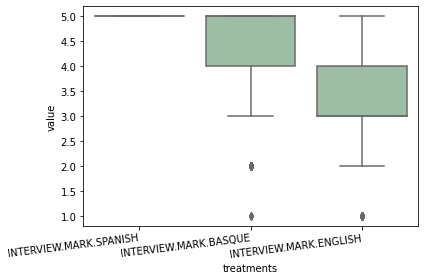

,sum_sq,df,F,PR(>F)
C(treatments),928.204103,2.0,818.004419,1.372281e-258
Residual,1104.647692,1947.0,NaN,NaN


In [36]:
#INTERVIEW

bestM2 = best[["INTERVIEW.MARK.SPANISH", "INTERVIEW.MARK.BASQUE", "INTERVIEW.MARK.ENGLISH"]]
bestM2.describe()
bestM2M = pd.melt(bestM2.reset_index(), id_vars=['index'], value_vars=['INTERVIEW.MARK.SPANISH', 'INTERVIEW.MARK.BASQUE', 'INTERVIEW.MARK.ENGLISH'])
bestM2M.columns = ['index', 'treatments', 'value']

ax = sns.boxplot(x='treatments', y='value', data=bestM2M, color='#99c2a2')
#ax = sns.swarmplot(x="treatments", y="value", data=bestM2M, color='#7d0013')
ax.set_xticklabels(ax.get_xticklabels(), rotation=7, ha="right")
plt.tight_layout()
plt.show()

fvalue, pvalue = stats.f_oneway(bestM2['INTERVIEW.MARK.SPANISH'], bestM2['INTERVIEW.MARK.BASQUE'], bestM2['INTERVIEW.MARK.ENGLISH'])

model2 = ols('value ~ C(treatments)', data=bestM2M).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
anova_table2

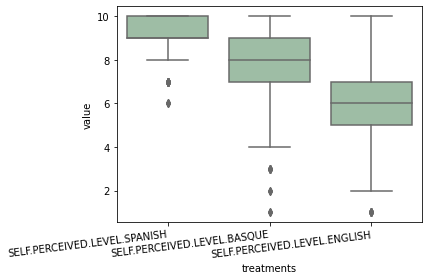

,sum_sq,df,F,PR(>F)
C(treatments),3219.564103,2.0,686.865308,1.891469e-226
Residual,4563.115385,1947.0,NaN,NaN


In [37]:
#SELF.PERCEIVED.LEVEL

bestM3 = best[["SELF.PERCEIVED.LEVEL.SPANISH", "SELF.PERCEIVED.LEVEL.BASQUE", "SELF.PERCEIVED.LEVEL.ENGLISH"]]
bestM3.describe()
bestM3M = pd.melt(bestM3.reset_index(), id_vars=['index'], value_vars=['SELF.PERCEIVED.LEVEL.SPANISH', 'SELF.PERCEIVED.LEVEL.BASQUE', 'SELF.PERCEIVED.LEVEL.ENGLISH'])
bestM3M.columns = ['index', 'treatments', 'value']

ax = sns.boxplot(x='treatments', y='value', data=bestM3M, color='#99c2a2')
#ax = sns.swarmplot(x="treatments", y="value", data=bestM2M, color='#7d0013')
ax.set_xticklabels(ax.get_xticklabels(), rotation=7, ha="right")
plt.tight_layout()
plt.show()

fvalue, pvalue = stats.f_oneway(bestM3['SELF.PERCEIVED.LEVEL.SPANISH'], bestM3['SELF.PERCEIVED.LEVEL.BASQUE'], bestM3['SELF.PERCEIVED.LEVEL.ENGLISH'])

model3 = ols('value ~ C(treatments)', data=bestM3M).fit()
anova_table3 = sm.stats.anova_lm(model3, typ=2)
anova_table3

### Research Question 2: Is there a correlation between the proficiency in each language spoken in Basque Country and its respective percentage exposed?

<AxesSubplot:>

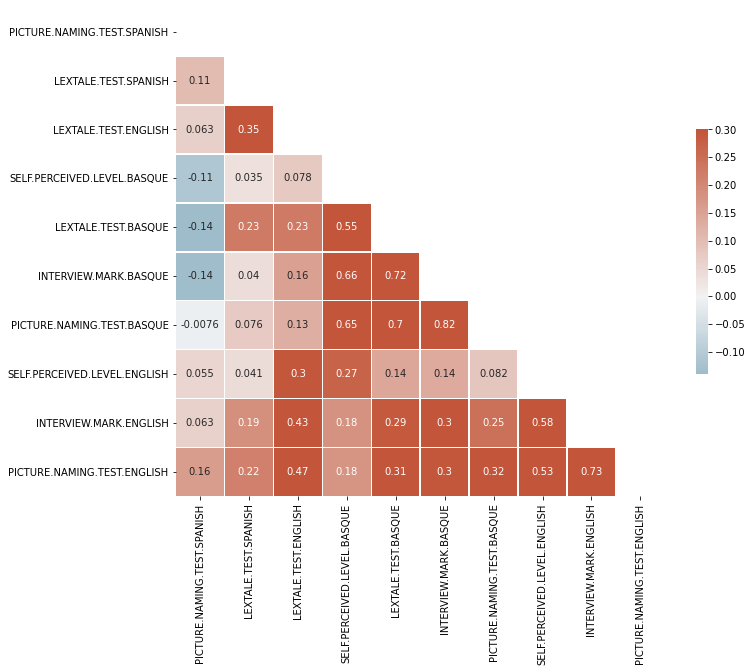

In [12]:
#Correlation matrix of all proficiency measurements

df = pd.DataFrame(best,columns=['PICTURE.NAMING.TEST.SPANISH','LEXTALE.TEST.SPANISH','LEXTALE.TEST.ENGLISH','SELF.PERCEIVED.LEVEL.BASQUE','LEXTALE.TEST.BASQUE','INTERVIEW.MARK.BASQUE','PICTURE.NAMING.TEST.BASQUE','SELF.PERCEIVED.LEVEL.ENGLISH','INTERVIEW.MARK.ENGLISH','PICTURE.NAMING.TEST.ENGLISH'])

corrMatrix = df.corr()
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corrMatrix, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     84.62
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           4.88e-19
Time:                        16:14:22   Log-Likelihood:                -2487.7
No. Observations:                 650   AIC:                             4979.
Df Residuals:                     648   BIC:                             4988.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.0199      0.680     58.888      0.0

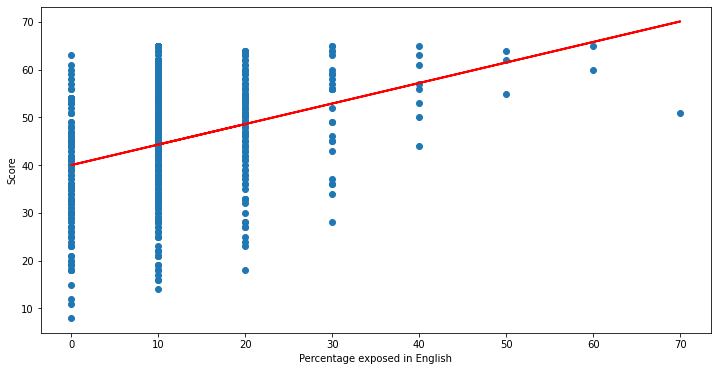

In [13]:
# [English] PICTURE.NAMING.TEST

bestP = best[['PICTURE.NAMING.TEST.ENGLISH', 'PERCENTAGE.EXPOSED.ENGLISH']]
bestP
bestP.columns = ['Y', 'X']

model = smf.ols('Y ~ X', data=bestP)
model = model.fit()

English_pred = model.predict()

plt.figure(figsize=(12, 6))
plt.plot(bestP['X'], bestP['Y'], 'o')           
plt.plot(bestP['X'], English_pred, 'r', linewidth=2)  
plt.xlabel('Percentage exposed in English')
plt.ylabel('Score')

print(model.summary())
print('\nIntercept =', model.params[0])
print('Slope =', model.params[1])
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     219.0
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           6.75e-43
Time:                        16:58:32   Log-Likelihood:                -2411.2
No. Observations:                 650   AIC:                             4826.
Df Residuals:                     648   BIC:                             4835.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.0964      0.784     56.236      0.0

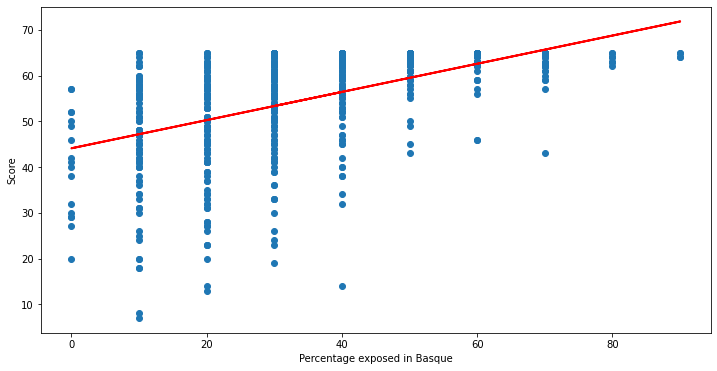

In [38]:
# [Basque] PICTURE.NAMING.TEST

bestP1 = best[['PICTURE.NAMING.TEST.BASQUE', 'PERCENTAGE.EXPOSED.BASQUE']]
bestP1
bestP1.columns = ['Y', 'X']

model = smf.ols('Y ~ X', data=bestP1)
model = model.fit()

Basque_pred = model.predict()

plt.figure(figsize=(12, 6))
plt.plot(bestP1['X'], bestP1['Y'], 'o')           
plt.plot(bestP1['X'], Basque_pred, 'r', linewidth=2)  
plt.xlabel('Percentage exposed in Basque')
plt.ylabel('Score')

print(model.summary())
print('\nIntercept =', model.params[0])
print('Slope =', model.params[1])
plt.show()


Intercept = 63.85235128200639
Slope = 0.011958148354489686
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     27.20
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           2.47e-07
Time:                        17:04:43   Log-Likelihood:                -1005.3
No. Observations:                 650   AIC:                             2015.
Df Residuals:                     648   BIC:                             2024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

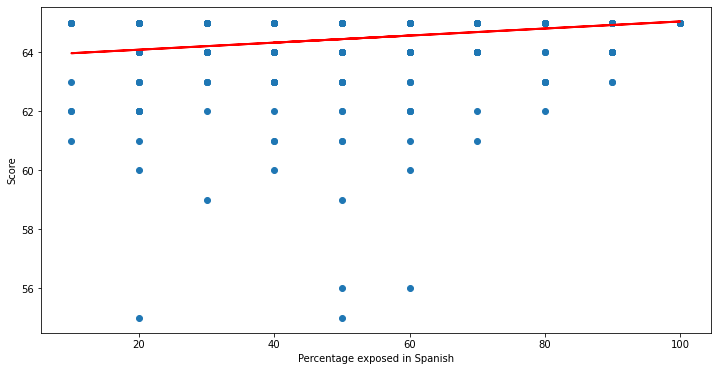

In [39]:
# [Spanish] PICTURE.NAMING.TEST

bestP2 = best[['PICTURE.NAMING.TEST.SPANISH', 'PERCENTAGE.EXPOSED.SPANISH']]
bestP2
bestP2.columns = ['Y', 'X']

model = smf.ols('Y ~ X', data=bestP2)
model = model.fit()

Spanish_pred = model.predict()

plt.figure(figsize=(12, 6))
plt.plot(bestP2['X'], bestP2['Y'], 'o')           
plt.plot(bestP2['X'], Spanish_pred, 'r', linewidth=2)  
plt.xlabel('Percentage exposed in Spanish')
plt.ylabel('Score')

print('\nIntercept =', model.params[0])
print('Slope =', model.params[1])
print(model.summary())
plt.show()


Intercept = 63.575641199160856
Slope = 0.2845976855924743
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     58.85
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           6.25e-14
Time:                        17:06:45   Log-Likelihood:                -2338.1
No. Observations:                 650   AIC:                             4680.
Df Residuals:                     648   BIC:                             4689.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

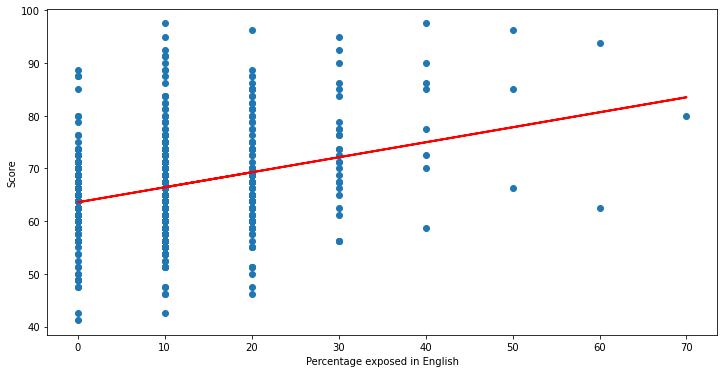

In [40]:
#[English] LEXTALE.TEST

bestR = best[['LEXTALE.TEST.ENGLISH', 'PERCENTAGE.EXPOSED.ENGLISH']]
bestR
bestR.columns = ['Y', 'X']

model = smf.ols('Y ~ X', data=bestR)
model = model.fit()

English_pred = model.predict()

plt.figure(figsize=(12, 6))
plt.plot(bestR['X'], bestR['Y'], 'o')           
plt.plot(bestR['X'], English_pred, 'r', linewidth=2)  
plt.xlabel('Percentage exposed in English')
plt.ylabel('Score')

print('\nIntercept =', model.params[0])
print('Slope =', model.params[1])
print(model.summary())
plt.show()


Intercept = 77.9315763771258
Slope = 0.25719207122088544
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     184.2
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           4.15e-37
Time:                        17:11:00   Log-Likelihood:                -2350.0
No. Observations:                 650   AIC:                             4704.
Df Residuals:                     648   BIC:                             4713.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

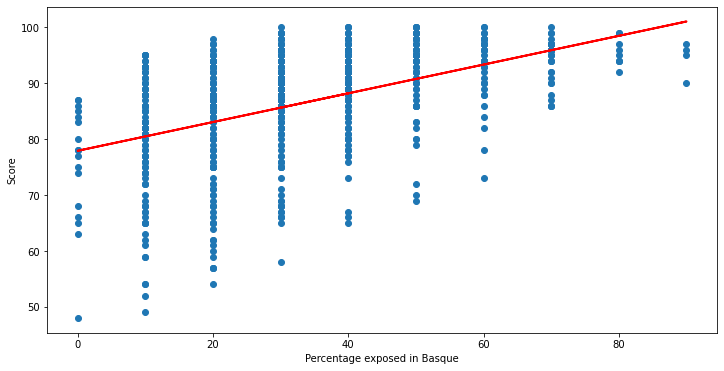

In [41]:
#[Basque] LEXTALE.TEST

bestR1 = best[['LEXTALE.TEST.BASQUE', 'PERCENTAGE.EXPOSED.BASQUE']]
bestR1
bestR1.columns = ['Y', 'X']

model1 = smf.ols('Y ~ X', data=bestR1)
model1 = model1.fit()

Basque_pred = model1.predict()

plt.figure(figsize=(12, 6))
plt.plot(bestR1['X'], bestR1['Y'], 'o')          
plt.plot(bestR1['X'], Basque_pred, 'r', linewidth=2)  
plt.xlabel('Percentage exposed in Basque')
plt.ylabel('Score')

print('\nIntercept =', model1.params[0])
print('Slope =', model1.params[1])
print(model1.summary())
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.04306
Date:                Sat, 04 Dec 2021   Prob (F-statistic):              0.836
Time:                        17:12:29   Log-Likelihood:                -1982.0
No. Observations:                 650   AIC:                             3968.
Df Residuals:                     648   BIC:                             3977.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.2571      0.605    155.677      0.0

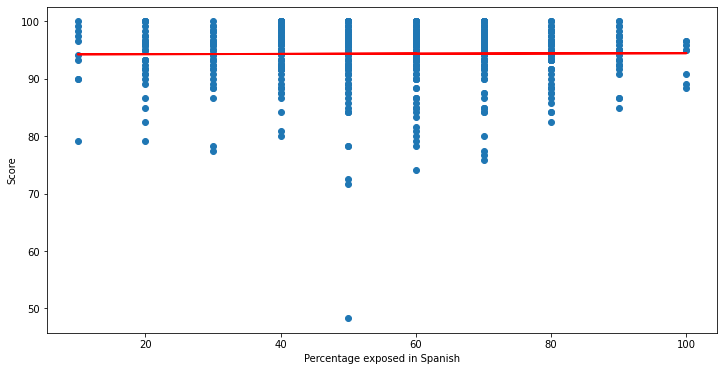

In [42]:
#[Spanish] LEXTALE.TEST

bestR2 = best[['LEXTALE.TEST.SPANISH', 'PERCENTAGE.EXPOSED.SPANISH']]
bestR2
bestR2.columns = ['Y', 'X']

model2 = smf.ols('Y ~ X', data=bestR2)
model2 = model2.fit()

Spanish_pred = model2.predict()

plt.figure(figsize=(12, 6))
plt.plot(bestR2['X'], bestR2['Y'], 'o')           
plt.plot(bestR2['X'], Spanish_pred, 'r', linewidth=2)   
plt.xlabel('Percentage exposed in Spanish')
plt.ylabel('Score')

print(model2.summary())
plt.show()

### Research Question 3: Is there a correlation between the proficiency in each language spoken in Basque Country and its respective age of acquisition?

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """



Intercept = 60.1843240055077
Slope = 0.352032450418213
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     21.98
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           3.36e-06
Time:                        17:15:08   Log-Likelihood:                -2355.6
No. Observations:                 650   AIC:                             4715.
Df Residuals:                     648   BIC:                             4724.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

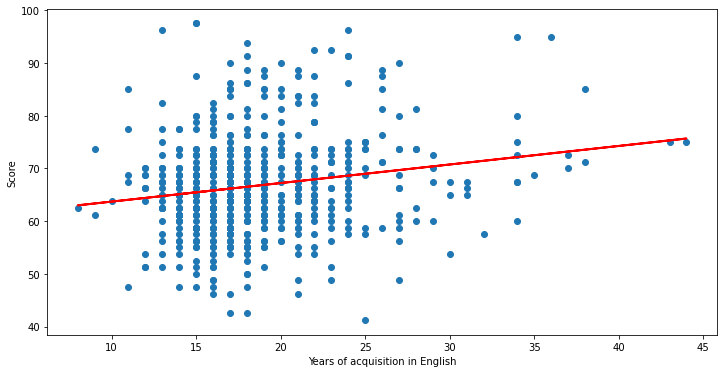

In [44]:
#[English] LEXTALE.TEST

bestA = best[['AGE.IN.YEARS', 'AGE.OF.ACQUISITION.ENGLISH', 'LEXTALE.TEST.ENGLISH']]
dif_column = bestA["AGE.IN.YEARS"] - bestA["AGE.OF.ACQUISITION.ENGLISH"]
bestA["YEARS.OF.ACQUISITION"] = dif_column
bestA1 = bestA[['LEXTALE.TEST.ENGLISH', 'YEARS.OF.ACQUISITION']]
bestA1.columns = ['Y', 'X']

model = smf.ols('Y ~ X', data=bestA1)
model = model.fit()

yearsAndEnglish_pred = model.predict()

plt.figure(figsize=(12, 6))
plt.plot(bestA1['X'], bestA1['Y'], 'o')           
plt.plot(bestA1['X'], yearsAndEnglish_pred, 'r', linewidth=2)   
plt.xlabel('Years of acquisition in English')
plt.ylabel('Score')

print('\nIntercept =', model.params[0])
print('Slope =', model.params[1])
print(model.summary())
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """



Intercept = 78.19191392183274
Slope = 0.34941048977120726
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     27.67
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.95e-07
Time:                        17:17:45   Log-Likelihood:                -2417.7
No. Observations:                 650   AIC:                             4839.
Df Residuals:                     648   BIC:                             4848.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

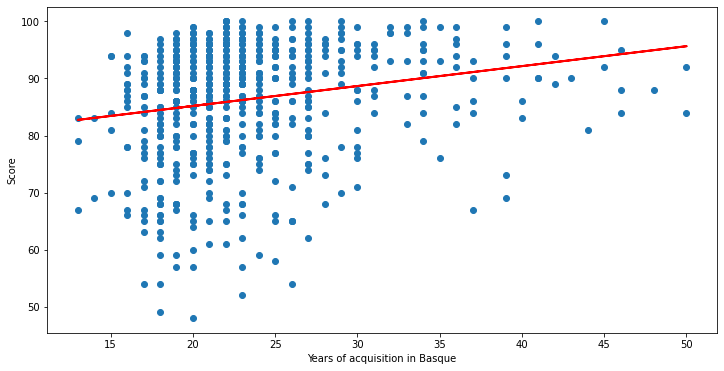

In [45]:
#[Basque] LEXTALE.TEST

bestB = best[['AGE.IN.YEARS', 'AGE.OF.ACQUISITION.BASQUE', 'LEXTALE.TEST.BASQUE']]
dif_column = bestB["AGE.IN.YEARS"] - bestB["AGE.OF.ACQUISITION.BASQUE"]
bestB["YEARS.OF.ACQUISITION"] = dif_column
bestB1 = bestB[['LEXTALE.TEST.BASQUE', 'YEARS.OF.ACQUISITION']]
bestB1.columns = ['Y', 'X']

model = smf.ols('Y ~ X', data=bestB1)
model = model.fit()

yearsAndBasque_pred = model.predict()

plt.figure(figsize=(12, 6))
plt.plot(bestB1['X'], bestB1['Y'], 'o')           
plt.plot(bestB1['X'], yearsAndBasque_pred, 'r', linewidth=2)   
plt.xlabel('Years of acquisition in Basque')
plt.ylabel('Score')

print('\nIntercept =', model.params[0])
print('Slope =', model.params[1])
print(model.summary())
plt.show()


Intercept = 89.4767456568428
Slope = 0.20118115510817502
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     32.91
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.48e-08
Time:                        17:20:49   Log-Likelihood:                -1966.0
No. Observations:                 650   AIC:                             3936.
Df Residuals:                     648   BIC:                             3945.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


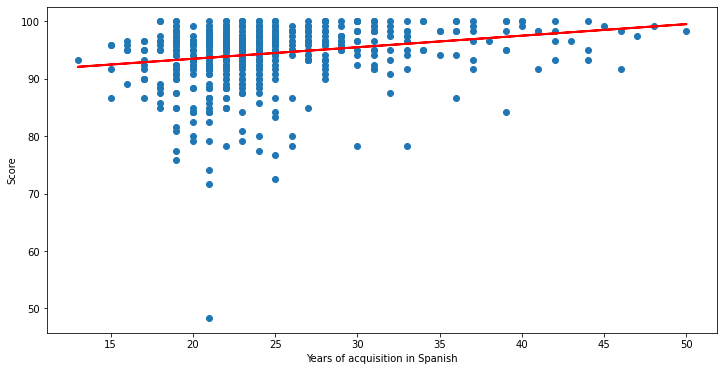

In [46]:
#[Spanish] LEXTALE.TEST

bestC = best[['AGE.IN.YEARS', 'AGE.OF.ACQUISITION.SPANISH', 'LEXTALE.TEST.SPANISH']]
dif_column = bestC["AGE.IN.YEARS"] - bestC["AGE.OF.ACQUISITION.SPANISH"]
bestC["YEARS.OF.ACQUISITION"] = dif_column
bestC1 = bestC[['LEXTALE.TEST.SPANISH', 'YEARS.OF.ACQUISITION']]
bestC1.columns = ['Y', 'X']

model = smf.ols('Y ~ X', data=bestC1)
model = model.fit()

yearsAndSpanish_pred = model.predict()

plt.figure(figsize=(12, 6))
plt.plot(bestC1['X'], bestC1['Y'], 'o')           
plt.plot(bestC1['X'], yearsAndSpanish_pred, 'r', linewidth=2)   
plt.xlabel('Years of acquisition in Spanish')
plt.ylabel('Score')

print('\nIntercept =', model.params[0])
print('Slope =', model.params[1])
print(model.summary())
plt.show()

### Research Question 4: Is there a difference in perceived English proficiency between people with different educational level?

In [22]:
#Hypothesis 4 Education Level and English Skill

bestBefore1 = best[best['MAXIMUM.EDUCATIONAL.LEVEL'] == 'Professional Training']
bestBefore2 = best[best['MAXIMUM.EDUCATIONAL.LEVEL'] == 'High School']

bestBefore3 = [bestBefore1, bestBefore2]
bestBefore = pd.concat(bestBefore3)

bestAfter1 = best[best['MAXIMUM.EDUCATIONAL.LEVEL'] == 'University']
bestAfter2 = best[best['MAXIMUM.EDUCATIONAL.LEVEL'] == 'Postgraduate']

bestAfter3 = [bestAfter1, bestAfter2]
bestAfter = pd.concat(bestAfter3)

print("Standard Deviation of Before University is % s "% (statistics.stdev(bestBefore['LEXTALE.TEST.ENGLISH'])))
print("Mean of Before University is % s " % (statistics.mean(bestBefore['LEXTALE.TEST.ENGLISH']))) 
print("Standard Deviation of After University is % s "% (statistics.stdev(bestAfter['LEXTALE.TEST.ENGLISH'])))
print("Mean of After University is % s " % (statistics.mean(bestAfter['LEXTALE.TEST.ENGLISH']))) 
ttest_ind(bestBefore['LEXTALE.TEST.ENGLISH'], bestAfter['LEXTALE.TEST.ENGLISH'])

Standard Deviation of Before University is 8.736988371058983 
Mean of Before University is 65.38557213930348 
Standard Deviation of After University is 9.38734902286794 
Mean of After University is 67.3608017817372 


Ttest_indResult(statistic=-2.5321780611868867, pvalue=0.011570686849271034)